In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context("talk")

# Reproducible visualization

In "The Functional Art: An introduction to information graphics and visualization" by Alberto Cairo, on page 12 we are presented with a visualization of UN data time series of Fertility rate (average number of children per woman) per country:

Figure 1.6 Highlighting the relevant, keeping the secondary in the background.

Let's try to reproduce this.

## Getting the data

The visualization was done in 2012, but limited the visualization to 2010. This should make it easy, in theory, to get the data, since it is historical. These are directly available as excel spreadsheets now, we'll just ignore the last bucket (2010-2015). 

Pandas allows loading an excel spreadsheet straight from a URL, but here we will download it first so we have a local copy.

In [3]:
!wget 'http://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

--2015-12-29 16:57:23--  http://esa.un.org/unpd/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/2_Fertility/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS
Resolving esa.un.org... 157.150.185.69
Connecting to esa.un.org|157.150.185.69|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869376 (849K) [application/vnd.ms-excel]
Saving to: 'WPP2015_FERT_F04_TOTAL_FERTILITY.XLS'

WPP2015_FERT_F04_TO 100%[=====================>] 849.00K   184KB/s   in 4.6s   

2015-12-29 16:57:28 (184 KB/s) - 'WPP2015_FERT_F04_TOTAL_FERTILITY.XLS' saved [869376/869376]



###World Population Prospects: The 2015 Revision								
File FERT/4: Total fertility by major area, region and country, 1950-2100 (children per woman)						

```
Estimates, 1950 - 2015								
POP/DB/WPP/Rev.2015/FERT/F04								
July 2015 - Copyright © 2015 by United Nations. All rights reserved								
Suggested citation: United Nations, Department of Economic and Social Affairs, Population Division (2015). World Population Prospects: The 2015 Revision, DVD Edition.
```

In [2]:
df = pd.read_excel('WPP2015_FERT_F04_TOTAL_FERTILITY.XLS', skiprows=16, index_col = 'Country code')
df = df[df.index < 900]

In [3]:
len(df)

201

In [4]:
df.head()

,Index,Variant,"Major area, region, country or area *",Notes,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
Country code,,,,,,,,,,,,,,,,,
108,15,Estimates,Burundi,NaN,6.8010,6.8570,7.0710,7.2680,7.3430,7.4760,7.4280,7.5920,7.4310,7.1840,6.908,6.523,6.0756
174,16,Estimates,Comoros,NaN,6.0000,6.6010,6.9090,7.0500,7.0500,7.0500,7.0500,6.7000,6.1000,5.6000,5.200,4.900,4.6000
262,17,Estimates,Djibouti,NaN,6.3120,6.3874,6.5470,6.7070,6.8450,6.6440,6.2570,6.1810,5.8500,4.8120,4.210,3.700,3.3000
232,18,Estimates,Eritrea,NaN,6.9650,6.9650,6.8150,6.6990,6.6200,6.6200,6.7000,6.5100,6.2000,5.6000,5.100,4.800,4.4000
231,19,Estimates,Ethiopia,NaN,7.1696,6.9023,6.8972,6.8691,7.1038,7.1838,7.4247,7.3673,7.0888,6.8335,6.131,5.258,4.5889


First problem... The book states on page 8: 

-- <cite>"Using the filters the site offers, I asked for a table that included the more than 150 countries on which the UN has complete research."</cite>

Yet we have 201 countries (codes 900+ are regions) with complete data. We do not have a easy way to identify which countries were added to this. Still, let's move forward and prep our data.

In [5]:
df.rename(columns={df.columns[2]:'Description'}, inplace=True)

In [6]:
df.drop(df.columns[[0, 1, 3, 16]], axis=1, inplace=True) # drop what we dont need

In [7]:
df.head()

,Description,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country code,,,,,,,,,,,,,
108,Burundi,6.8010,6.8570,7.0710,7.2680,7.3430,7.4760,7.4280,7.5920,7.4310,7.1840,6.908,6.523
174,Comoros,6.0000,6.6010,6.9090,7.0500,7.0500,7.0500,7.0500,6.7000,6.1000,5.6000,5.200,4.900
262,Djibouti,6.3120,6.3874,6.5470,6.7070,6.8450,6.6440,6.2570,6.1810,5.8500,4.8120,4.210,3.700
232,Eritrea,6.9650,6.9650,6.8150,6.6990,6.6200,6.6200,6.7000,6.5100,6.2000,5.6000,5.100,4.800
231,Ethiopia,7.1696,6.9023,6.8972,6.8691,7.1038,7.1838,7.4247,7.3673,7.0888,6.8335,6.131,5.258


In [8]:
highlight_countries = ['Niger','Yemen','India',
                       'Brazil','Norway','France','Sweden','United Kingdom',
                       'Spain','Italy','Germany','Japan', 'China'
                      ]

In [9]:
# Subset only countries to highlight, transpose for timeseries
df_high = df[df.Description.isin(highlight_countries)].T[1:]

In [10]:
# Subset the rest of the countries, transpose for timeseries
df_bg = df[~df.Description.isin(highlight_countries)].T[1:]

## Let's make some art

(1, 9.0)

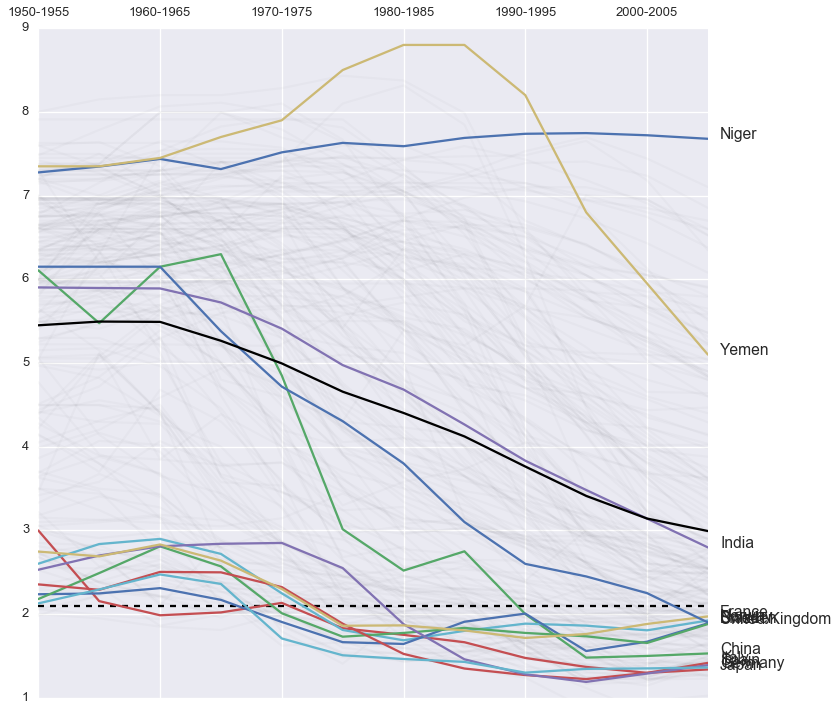

In [11]:
# background
ax = df_bg.plot(legend=False, color='k', alpha=0.02, figsize=(12,12))
ax.xaxis.tick_top()

# highlighted countries
df_high.plot(legend=False, ax=ax)

# replacement level line
ax.hlines(y=2.1, xmin=0, xmax=12, color='k', alpha=1, linestyle='dashed')

# Average over time on all countries
df.mean().plot(ax=ax, color='k', label='World\naverage')

# labels for highlighted countries on the right side
for country in highlight_countries:
    ax.text(11.2,df[df.Description==country].values[0][12],country)
    
# start y axis at 1
ax.set_ylim(ymin=1)

For one thing, the line for China doesn't look like the one in the book. Concerning. The other issue is that there are some lines that are going lower than Italy or Spain in 1995-2000 and in 2000-2005 (majority in the Balkans) and that were not on the graph in the book, AFAICT:

In [12]:
df.describe()

,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,5.45045,5.495005,5.491424,5.265483,4.994911,4.657349,4.403227,4.122837,3.762972,3.412293,3.141556,2.992349
std,1.64388,1.674181,1.734726,1.849984,1.944553,2.039995,2.033660,1.952100,1.849278,1.791151,1.701363,1.562150
min,1.98000,1.950000,1.850000,1.810000,1.623000,1.407900,1.427300,1.349700,1.240000,0.870000,0.825200,0.937900
25%,4.27700,4.201000,4.273100,3.447000,2.990000,2.540200,2.301500,2.230000,2.050000,1.889100,1.806100,1.818200
50%,5.99500,6.134100,6.129700,5.950000,5.470000,4.974900,4.370000,3.800000,3.343000,2.941500,2.600000,2.479300
75%,6.70000,6.764000,6.800000,6.707000,6.700000,6.525000,6.315000,5.900000,5.217000,4.637000,4.210000,3.980000
max,8.00000,8.150000,8.200000,8.200000,8.284000,8.500000,8.800000,8.800000,8.200000,7.746600,7.720900,7.678700


In [13]:
df[df['1995-2000']<1.25]

,Description,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country code,,,,,,,,,,,,,
344,"China, Hong Kong SAR",4.4400,4.7200,5.3100,3.6450,3.2900,2.3100,1.7150,1.3550,1.2400,0.8700,0.9585,1.0257
446,"China, Macao SAR",4.3858,5.1088,4.4077,2.7367,1.7930,1.4079,1.9769,1.9411,1.4050,1.1160,0.8252,0.9379
100,Bulgaria,2.5264,2.2969,2.2171,2.1304,2.1573,2.1927,2.0149,1.9458,1.5527,1.2008,1.2404,1.5005
203,Czech Republic,2.7383,2.3765,2.2088,1.9573,2.2108,2.3588,1.9660,1.9008,1.6455,1.1670,1.1870,1.4286
643,Russian Federation,2.8500,2.8200,2.5500,2.0200,2.0300,1.9400,2.0400,2.1210,1.5450,1.2470,1.2980,1.4389
804,Ukraine,2.8100,2.7000,2.1346,2.0204,2.0789,1.9798,2.0040,1.8968,1.6208,1.2404,1.1455,1.3828
428,Latvia,2.0000,1.9500,1.8500,1.8100,2.0000,1.8745,2.0293,2.1309,1.6322,1.1722,1.2856,1.4926
380,Italy,2.3550,2.2900,2.5040,2.4989,2.3227,1.8856,1.5245,1.3497,1.2715,1.2239,1.2974,1.4169
705,Slovenia,2.6800,2.3833,2.3354,2.2650,2.1999,2.1632,1.9280,1.6517,1.3335,1.2483,1.2114,1.3841


In [14]:
df[df['2000-2005']<1.25]

,Description,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country code,,,,,,,,,,,,,
344,"China, Hong Kong SAR",4.4400,4.7200,5.3100,3.6450,3.2900,2.3100,1.7150,1.3550,1.2400,0.8700,0.9585,1.0257
446,"China, Macao SAR",4.3858,5.1088,4.4077,2.7367,1.7930,1.4079,1.9769,1.9411,1.4050,1.1160,0.8252,0.9379
410,Republic of Korea,5.0500,6.3320,5.6300,4.7080,4.2810,2.9190,2.2340,1.6010,1.6960,1.5140,1.2190,1.2284
100,Bulgaria,2.5264,2.2969,2.2171,2.1304,2.1573,2.1927,2.0149,1.9458,1.5527,1.2008,1.2404,1.5005
203,Czech Republic,2.7383,2.3765,2.2088,1.9573,2.2108,2.3588,1.9660,1.9008,1.6455,1.1670,1.1870,1.4286
498,Republic of Moldova,3.5000,3.4400,3.1500,2.6600,2.5600,2.4400,2.5500,2.6400,2.1110,1.7000,1.2378,1.2704
703,Slovakia,3.5022,3.2427,2.9110,2.5410,2.5067,2.4640,2.2710,2.1537,1.8667,1.4010,1.2205,1.3100
804,Ukraine,2.8100,2.7000,2.1346,2.0204,2.0789,1.9798,2.0040,1.8968,1.6208,1.2404,1.1455,1.3828
70,Bosnia and Herzegovina,4.7700,3.9086,3.6830,3.1372,2.7332,2.1900,2.1200,1.9100,1.6500,1.6261,1.2155,1.2845


The other thing that I really need to address is the labeling. Clearly we need the functionality to move labels up and down to make them readable. Collision detection, basically. I'm surprised this functionality doesn't exist, because I keep bumping into that. Usually, I can tweak the Y pos by a few pixels, but in this specific case, there is no way to do that.

So, I guess I have a project for 2016...
